In [1]:
# kaggle data
# https://www.kaggle.com/competitions/titanic/data

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
row_data = pd.read_csv('titanic/train.csv')
row_data.head()
# row_data.shape
# 891 rows * 12 col


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data preprocessing

Handle with duplicates, dropping IID columns, (univariant analysis here then resume data preprocessing) missing values, typos, the pair of columns that has a proportional relationship with high percentage, propbably above 80%. 

In [3]:
# print(row_data.columns)
prepro_data = row_data.copy() # 891 rows * 12 col

## removing duplicates  --> found no duplicates 
prepro_data.drop_duplicates
prepro_data.shape     # no duplicates found (891 * 12)



(891, 12)

In [4]:
prepro_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## All attributes, columns, with null values needs preprocessing. 
In the following lines we will target each attribute based on some metrics

### regarding the Cabin column 
it has 687 out of 891 which is around 77% of the data is null. <br>
Thus, it is better to drop the column.

In [5]:
prepro_data = prepro_data.drop('Cabin', axis=1)
prepro_data.shape


(891, 11)

### Regarding the Age column 
Around 20% of the data is null <br>

one thing to try is to assign the median or the mean value to the null values: 

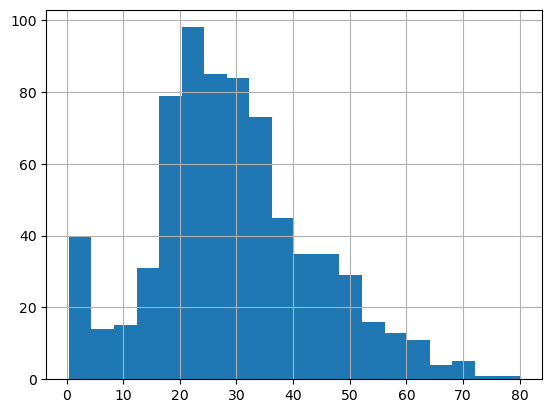

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4    

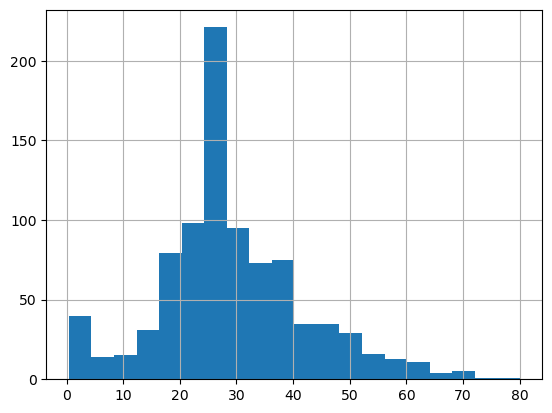

In [6]:
test = prepro_data.copy()
test['Age'].hist(bins=20)
plt.show()


# numeric_df = test.select_dtypes(include=['number'])
# age_correlation = numeric_df.corr()['Age'].sort_values(ascending=False)
# print(age_correlation)


mean_age_by_pclass = test.groupby('Pclass')['Age'].mean()
print(mean_age_by_pclass)
test['Age'] = test.apply(lambda row: mean_age_by_pclass[row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)
print(test['Age'].isna().sum())
print(test.head())


test['Age'].hist(bins=20)
plt.show()

# Age Nan values could be replaced with the mean of ages ... mean is suitable for normally distributed data. 
# test['Age'].fillna(test['Age'].mean(), inplace=True)

As you noticed from the two graphs above the distribution of hte age changed dramatically which will affect the AI model significantly. <br>

Thus, it is better to drop those values. 

In [7]:
prepro_data = prepro_data.dropna(subset=["Age"]) 
prepro_data.shape

(714, 11)

### Regarding the embarked attribute 
only two rows have null values: 

In [8]:
print(prepro_data["Embarked"].unique())
prepro_data = prepro_data.dropna(subset=["Embarked"])
print(prepro_data["Embarked"].unique())
print(prepro_data.shape)

['S' 'C' 'Q' nan]
['S' 'C' 'Q']
(712, 11)


Then lets review how the data look like now

In [9]:
print(prepro_data.isnull().sum())
print(prepro_data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
(712, 11)


## Dropping IID columns 

In [10]:
## passenger ID, Name, ticket
prepro_data = prepro_data.drop(['PassengerId'], axis=1)
prepro_data = prepro_data.drop(['Name'], axis=1)
prepro_data = prepro_data.drop(['Ticket'], axis=1)

print(prepro_data.shape)

(712, 8)


## Checking any typos 

In [11]:
print(prepro_data.columns)

# print("PassengerId: ",prepro_data['PassengerId'].unique())   # (survived from titanic accident ) 1 yes  ---- 2 no 
print("survived: ",prepro_data['Survived'].unique())   # (survived from titanic accident ) 1 yes  ---- 2 no 
print("Pclass: ",sorted(prepro_data['Pclass'].unique()))       # (socio-economic status)  1 is 1st class 3 is lowest 
# print("Name: ",prepro_data['Name'].unique())       # (socio-economic status)  1 is 1st class 3 is lowest
print("Sex: ",prepro_data['Sex'].unique())             # 
print("Age range: ",prepro_data['Age'].min(), " to ", prepro_data['Age'].max())             # 
print("SibSp: ",sorted(prepro_data['SibSp'].unique())) 
print("Parch: ",sorted(prepro_data['Parch'].unique())) 
# print("Ticket: ",prepro_data['Ticket'].unique()) 
# print("Fare range: ",prepro_data['Fare'].min(), " to ", row_data['Fare'].max())             # 
print("Fare: ",sorted(prepro_data['Fare'].unique()) )
print("Embarked: ",prepro_data['Embarked'].unique()) 


print("data shape: ",prepro_data.shape)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
survived:  [0 1]
Pclass:  [1, 2, 3]
Sex:  ['male' 'female']
Age range:  0.42  to  80.0
SibSp:  [0, 1, 2, 3, 4, 5]
Parch:  [0, 1, 2, 3, 4, 5, 6]
Fare:  [0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.75, 6.975, 7.0458, 7.05, 7.0542, 7.125, 7.1417, 7.225, 7.2292, 7.25, 7.4958, 7.5208, 7.55, 7.65, 7.7333, 7.7417, 7.75, 7.775, 7.7958, 7.8, 7.8542, 7.875, 7.8792, 7.8875, 7.8958, 7.925, 8.0292, 8.05, 8.1583, 8.3, 8.3625, 8.4042, 8.4333, 8.5167, 8.6542, 8.6625, 8.6833, 8.85, 9.0, 9.2167, 9.225, 9.35, 9.475, 9.4833, 9.5, 9.5875, 9.825, 9.8375, 9.8417, 9.8458, 10.1708, 10.4625, 10.5, 10.5167, 11.1333, 11.2417, 11.5, 12.0, 12.275, 12.2875, 12.35, 12.475, 12.525, 12.65, 12.875, 13.0, 13.4167, 13.5, 13.7917, 13.8583, 14.0, 14.1083, 14.4, 14.4542, 14.4583, 14.5, 15.0, 15.0458, 15.2458, 15.5, 15.55, 15.7417, 15.75, 15.85, 15.9, 16.0, 16.1, 16.7, 17.4, 17.8, 18.0, 18.75, 18.7875, 19.2583,

In [12]:

# printing prepro_data to a csv file 
data = pd.get_dummies(prepro_data, columns=['Sex', 'Embarked'], drop_first=True)

data.to_csv("Titanic_train_preprocessed.csv",index=False)

## Relationship between columns

printing a heat map

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [246]:
test = prepro_data.copy()

# one hot encoding before heat map to deal with text data as well like sex and embarked
test = pd.get_dummies(test )
test = test.replace({True: 1, False: 0})

corr = test.corr(numeric_only=True) 
# Displaying dataframe as an heatmap  
corr.style.background_gradient(cmap ='coolwarm') 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,0.536762,-0.536762,0.195673,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.150826,0.150826,-0.279194,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.099037,0.099037,0.038268,-0.021693,-0.025431
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.106296,-0.106296,-0.046227,0.051331,0.018968
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.249543,-0.249543,-0.009523,-0.009417,0.013259
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.182457,-0.182457,0.301337,-0.062346,-0.250994
Sex_female,0.536762,-0.150826,-0.099037,0.106296,0.249543,0.182457,1.000000,-1.000000,0.103611,0.027256,-0.109078
Sex_male,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,-1.000000,1.000000,-0.103611,-0.027256,0.109078
Embarked_C,0.195673,-0.279194,0.038268,-0.046227,-0.009523,0.301337,0.103611,-0.103611,1.000000,-0.095623,-0.884986
Embarked_Q,-0.048966,0.131989,-0.021693,0.051331,-0.009417,-0.062346,0.027256,-0.027256,-0.095623,1.000000,-0.378859


In [247]:
test = test.loc[test['Fare']<100]
corr = test.corr(numeric_only=True) 
# Displaying dataframe as an heatmap  
corr.style.background_gradient(cmap ='coolwarm') 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.320898,-0.095604,-0.024505,0.089441,0.283192,0.519411,-0.519411,0.175307,-0.040559,-0.139225
Pclass,-0.320898,1.000000,-0.394038,0.095712,0.107082,-0.680647,-0.100639,0.100639,-0.215501,0.120451,0.135597
Age,-0.095604,-0.394038,1.000000,-0.312672,-0.204845,0.152907,-0.112464,0.112464,0.019336,-0.020084,-0.007495
SibSp,-0.024505,0.095712,-0.312672,1.000000,0.380324,0.273747,0.107430,-0.107430,-0.045031,0.055788,0.012916
Parch,0.089441,0.107082,-0.204845,0.380324,1.000000,0.187123,0.268654,-0.268654,-0.014360,-0.000054,0.013105
Fare,0.283192,-0.680647,0.152907,0.273747,0.187123,1.000000,0.184556,-0.184556,0.236927,-0.051191,-0.189987
Sex_female,0.519411,-0.100639,-0.112464,0.107430,0.268654,0.184556,1.000000,-1.000000,0.081063,0.037648,-0.092781
Sex_male,-0.519411,0.100639,0.112464,-0.107430,-0.268654,-0.184556,-1.000000,1.000000,-0.081063,-0.037648,0.092781
Embarked_C,0.175307,-0.215501,0.019336,-0.045031,-0.014360,0.236927,0.081063,-0.081063,1.000000,-0.090422,-0.865150
Embarked_Q,-0.040559,0.120451,-0.020084,0.055788,-0.000054,-0.051191,0.037648,-0.037648,-0.090422,1.000000,-0.421230


## univarient graphs 

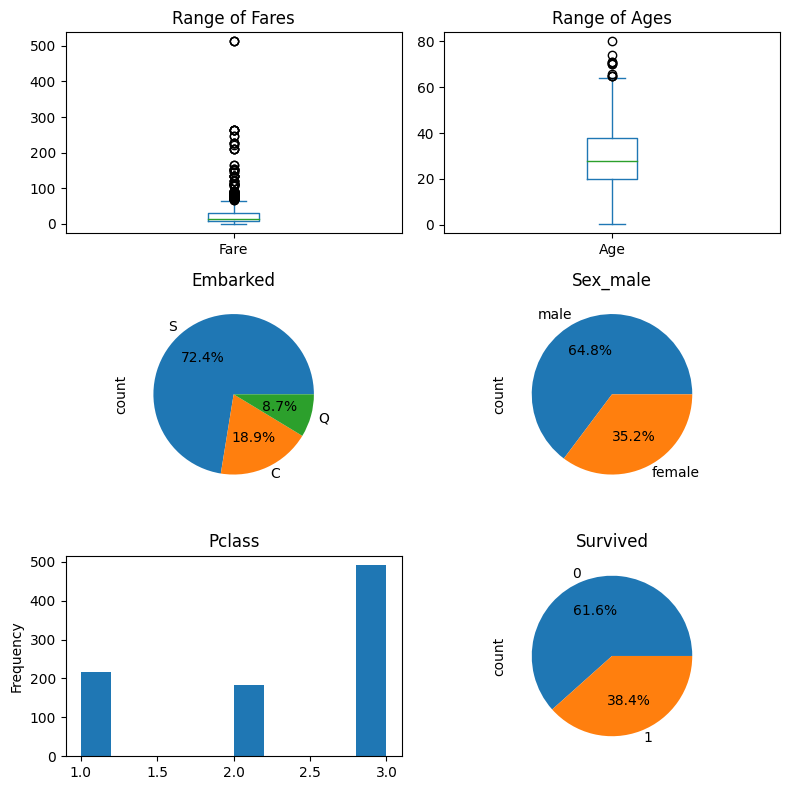

In [254]:
# prepro_data['Age'].plot(kind='box', title='range of ages ')
# test['Fare'].plot(kind='box', title='range of Fares ')
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
row_data['Fare'].plot(kind='box', title='Range of Fares', ax=axes[0,0])
row_data['Age'].plot(kind='box', title='Range of Ages', ax=axes[0,1])
row_data['Embarked'].value_counts().plot(kind='pie', title='Embarked', ax=axes[1, 0], autopct='%1.1f%%')
row_data['Sex'].value_counts().plot(kind='pie', title='Sex_male', ax=axes[1, 1], autopct='%1.1f%%')
row_data['Pclass'].plot(kind='hist', title='Pclass', ax=axes[2,0])
row_data['Survived'].value_counts().plot(kind='pie', title='Survived', ax=axes[2, 1], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

# # draw a histogram of the age column
# prepro_data['Pclass'].hist(bins = 100)
# # add labels and title
# plt.xlabel('Pclass')
# plt.ylabel('Frequency')
# plt.title('Distribution of Pclass')
# plt.show()

# # # draw a histogram of the age column
# prepro_data['Sex'].hist(bins = 100)
# # add labels and title
# plt.xlabel('Sex')
# plt.ylabel('Frequency')
# plt.title('Distribution of Sex')
# plt.show()


### Conclusion on univariant graphs 
- most fares ranges from around 10 to 30 
- ages range from 20 to 40 
- around 77% of flights embarked from S
- male passenger are twice female passengers 
- most of the passengers are of class 3 
- only 1/3 of the passengers did survive

## Multivariate Relations

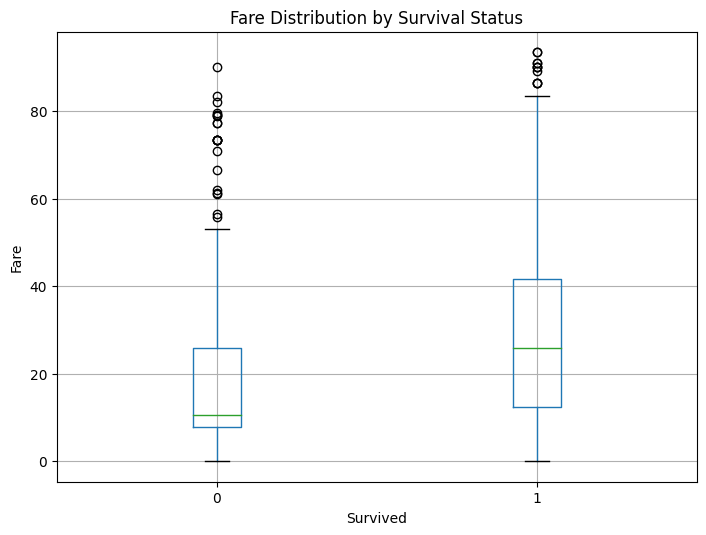

In [249]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
# test['Fare'].plot(kind='box', by='Survived' title='Range of Fares', ax=axes[0,0])
# Box plot showing the distribution of 'Fare' for each 'Survived' category
test.boxplot(column='Fare', by='Survived', figsize=(8, 6))

# Adding title and labels
plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # Suppresses the default title
plt.xlabel('Survived')
plt.ylabel('Fare')

# Display the plot
plt.show()

### the more fare you pay the more survival chances you get. 

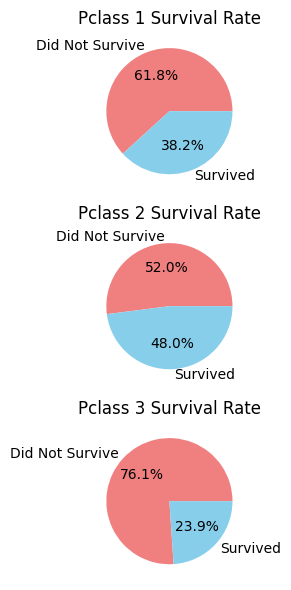

In [251]:
# Survived = test[test['Survived'] == 1]

# # Count the frequency of each Pclass
# pclass_counts = Survived['Pclass'].value_counts().sort_index()

# # Plot the bar graph
# plt.figure(figsize=(8, 6))
# pclass_counts.plot(kind='bar', color='skyblue')

# # Adding title and labels
# plt.title('Frequency of Pclass')
# plt.xlabel('Pclass')
# plt.ylabel('Frequency')

# # Display the plot
# plt.show()

import matplotlib.pyplot as plt

# Prepare data for each Pclass
pclass1 = test[test['Pclass'] == 1]['Survived'].value_counts()
pclass2 = test[test['Pclass'] == 2]['Survived'].value_counts()
pclass3 = test[test['Pclass'] == 3]['Survived'].value_counts()

# Function to generate labels dynamically
def generate_labels(counts):
    labels = []
    if 0 in counts:
        labels.append('Did Not Survive')
    if 1 in counts:
        labels.append('Survived')
    return labels

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(3, 1, figsize=(18, 6))

# Plot pie chart for Pclass 1
axes[0].pie(pclass1, labels=generate_labels(pclass1), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
axes[0].set_title('Pclass 1 Survival Rate')

# Plot pie chart for Pclass 2
axes[1].pie(pclass2, labels=generate_labels(pclass2), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
axes[1].set_title('Pclass 2 Survival Rate')

# Plot pie chart for Pclass 3
axes[2].pie(pclass3, labels=generate_labels(pclass3), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
axes[2].set_title('Pclass 3 Survival Rate')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


# Data manipulation

filtering, sorting, grouping

In [46]:
#filtering 
Age_filtered = row_data[row_data['Age'] > 70] 
Sex_filtered = row_data[row_data['Sex']=='male']
# Sex_filtered


# sortig 
Age_sorted = row_data.sort_values(by='Age')
# Age_sorted


# grouping 
Sex_grouping = row_data.groupby('Sex')
Sex_grouping.first()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


Here is a brief explanation for the data manipluation stage: 
a Very simple filteration is done on my row data to filter ages greater than 70 years old. 
    a filteration process is also done to filter males out of the whole dataset. 

Sorting the row data by age to see the effect of other variables wrt to age. 

A grouping approach is done for the sex column to view the average values and numbers for males and females. 



# Data Visualization    

Scatter Plot:  


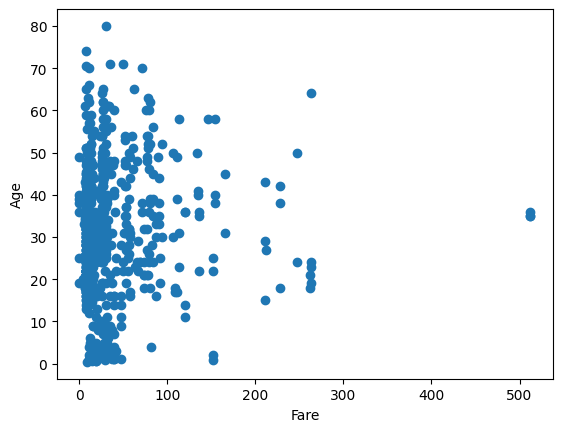

In [85]:
# row_data

index1 = "Fare"
index2 = "Age"

print("Scatter Plot:  ") 

plt.scatter(row_data[index1], row_data[index2]) 
plt.xlabel(index1)
plt.ylabel(index2)
# sns.scatterplot(data=row_data, x=index1, y=index2 , size="pop", legend=False, sizes=(20, 2000))
plt.show() 
# sns.show()



In [55]:
row_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
